In [55]:
from glob import glob
from astroquery.mast import Mast, Observations
import os
import shutil
import numpy as np
import json
import requests
import asdf
from astropy import log
from astropy import wcs
from astropy.io import ascii, fits
from astropy.utils.data import download_file
from astropy.visualization import simple_norm
from astropy.visualization import ImageNormalize, ManualInterval, LogStretch, LinearStretch
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table

from align_to_catalogs import *
import astropy.units as u

import align_to_catalogs

import jhat

ModuleNotFoundError: No module named 'jhat'

In [2]:
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['image.origin'] = 'lower'

In [3]:
files = glob('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong*')
files

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned_to_vvv.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_rate.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_tweakregstep.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_trapsfilled.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned_to_vvv_cat.ecsv',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_o002_crf.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_rateints.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_outlier_i2d.fits',
 '/orange/adamginsb

In [30]:
destreak_fn =  '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak_tweakregstep.fits'
destcatt_fn =  '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak_cat.ecsv'

In [7]:
frames = glob('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_0000*_nrcalong_destreak_tweakregstep.fits')
frames

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak_tweakregstep.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00004_nrcalong_destreak_tweakregstep.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00003_nrcalong_destreak_tweakregstep.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak_tweakregstep.fits']

In [8]:
frames_cat = glob('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_0000*_nrcalong_destreak_cat.ecsv')
frames_cat

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak_cat.ecsv',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00004_nrcalong_destreak_cat.ecsv',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00003_nrcalong_destreak_cat.ecsv',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak_cat.ecsv']

In [9]:
tbl = Table.read(destcatt_fn)
#tbl

In [10]:
pwd

'/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction'

In [13]:
crds_world = ww.pixel_to_world(tbl['x'], tbl['y'])

In [25]:
modules = ('nrca', 'nrcb')
spots = [('02201')]#('08201', '02201')

In [39]:
fn = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00002_nrcalong_destreak.fits'

In [44]:
hdr = fits.getheader(fn, ext=1)
ww = wcs.WCS(hdr)
gwcs = asdf.open(fn).tree['meta']['wcs']
data = np.nan_to_num(fits.getdata(fn, ext=1))

2023-08-07 14:53:41,289 - stpipe - INFO - 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                
20

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


2023-08-07 16:13:24,839 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2023-04-25T04:19:06.540' from MJD-BEG.
Set DATE-AVG to '2023-04-25T04:19:33.382' from MJD-AVG.
Set DATE-END to '2023-04-25T04:20:00.224' from MJD-END'.
  warnings.warn(

2023-08-07 16:13:24,842 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to  -120.018780 from OBSGEO-[XYZ].
Set OBSGEO-B to   -11.488787 from OBSGEO-[XYZ].
Set OBSGEO-H to 1386119146.156 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-08-07 16:13:25,989 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2023-04-15T15:08:19.326' from MJD-BEG.
Set DATE-AVG to '2023-04-15T15:08:46.168' from MJD-AVG.
Set DATE-END to '2023-04-15T15:09:13.010' from MJD-END'.
  

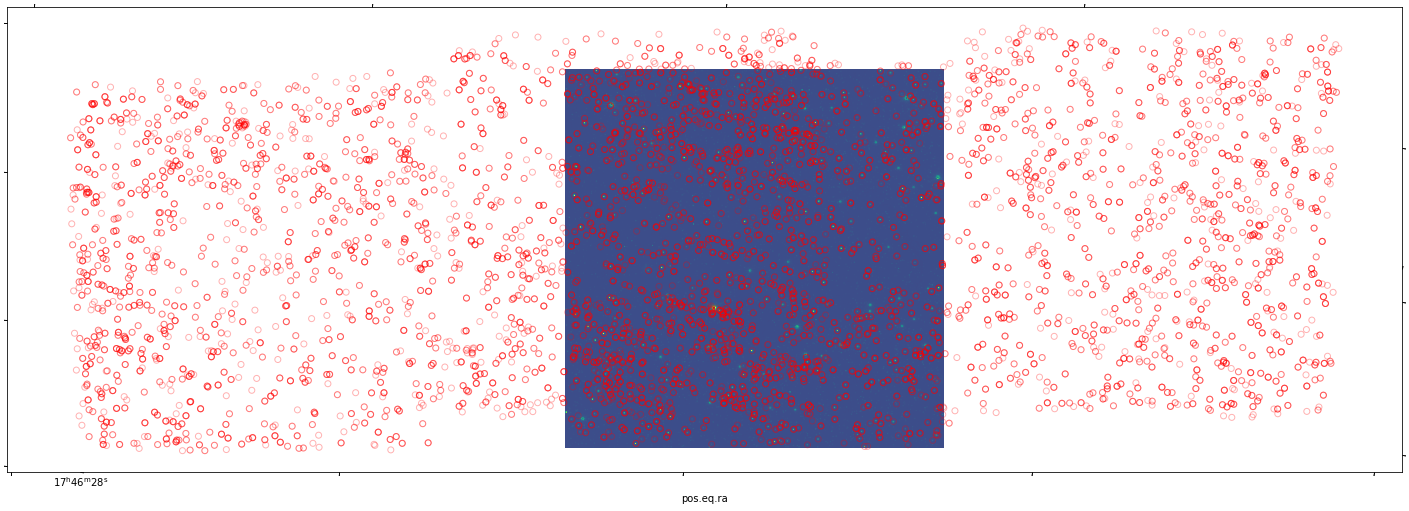

In [54]:
hdr = fits.getheader(fn, ext=1)
ww = wcs.WCS(hdr)
gwcs = asdf.open(fn).tree['meta']['wcs']
data = np.nan_to_num(fits.getdata(fn, ext=1))

plt.figure(figsize=(25, 25))
ax = plt.subplot(projection=wcs.WCS(fits.getheader(fn, ext=1)))
ax.imshow(data, norm=simple_norm(data, stretch='log', max_percent=99.95, log_a=1))

for mod in modules:
    for visit in ('1', '2'):
        for spot in spots:
            for i in range(4):
                fr = i+1
                fn = f'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw0222100200{visit}_{spot}_0000{fr}_{mod}long_destreak.fits'
                can = f'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw0222100200{visit}_{spot}_0000{fr}_{mod}long_destreak_cat.ecsv'
                tbl = Table.read(can)
                hdr = fits.getheader(fn, ext=1)
                ww = wcs.WCS(hdr)
                gwcs = asdf.open(fn).tree['meta']['wcs']
                data = fits.getdata(fn, ext=1)
                crds_world = ww.pixel_to_world(tbl['x'], tbl['y'])

                ax.scatter(crds_world.ra, crds_world.dec, edgecolor='r', facecolor='none', transform=ax.get_transform('world'), alpha=0.3)

2023-08-07 14:54:55,466 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2023-04-25T05:05:59.722' from MJD-BEG.
Set DATE-AVG to '2023-04-25T05:06:26.564' from MJD-AVG.
Set DATE-END to '2023-04-25T05:06:53.406' from MJD-END'.
  warnings.warn(

2023-08-07 14:54:55,469 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to  -119.975053 from OBSGEO-[XYZ].
Set OBSGEO-B to   -11.515215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1386464604.607 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-08-07 14:54:56,582 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2023-04-25T04:58:28.778' from MJD-BEG.
Set DATE-AVG to '2023-04-25T04:58:55.620' from MJD-AVG.
Set DATE-END to '2023-04-25T04:59:22.462' from MJD-END'.
  

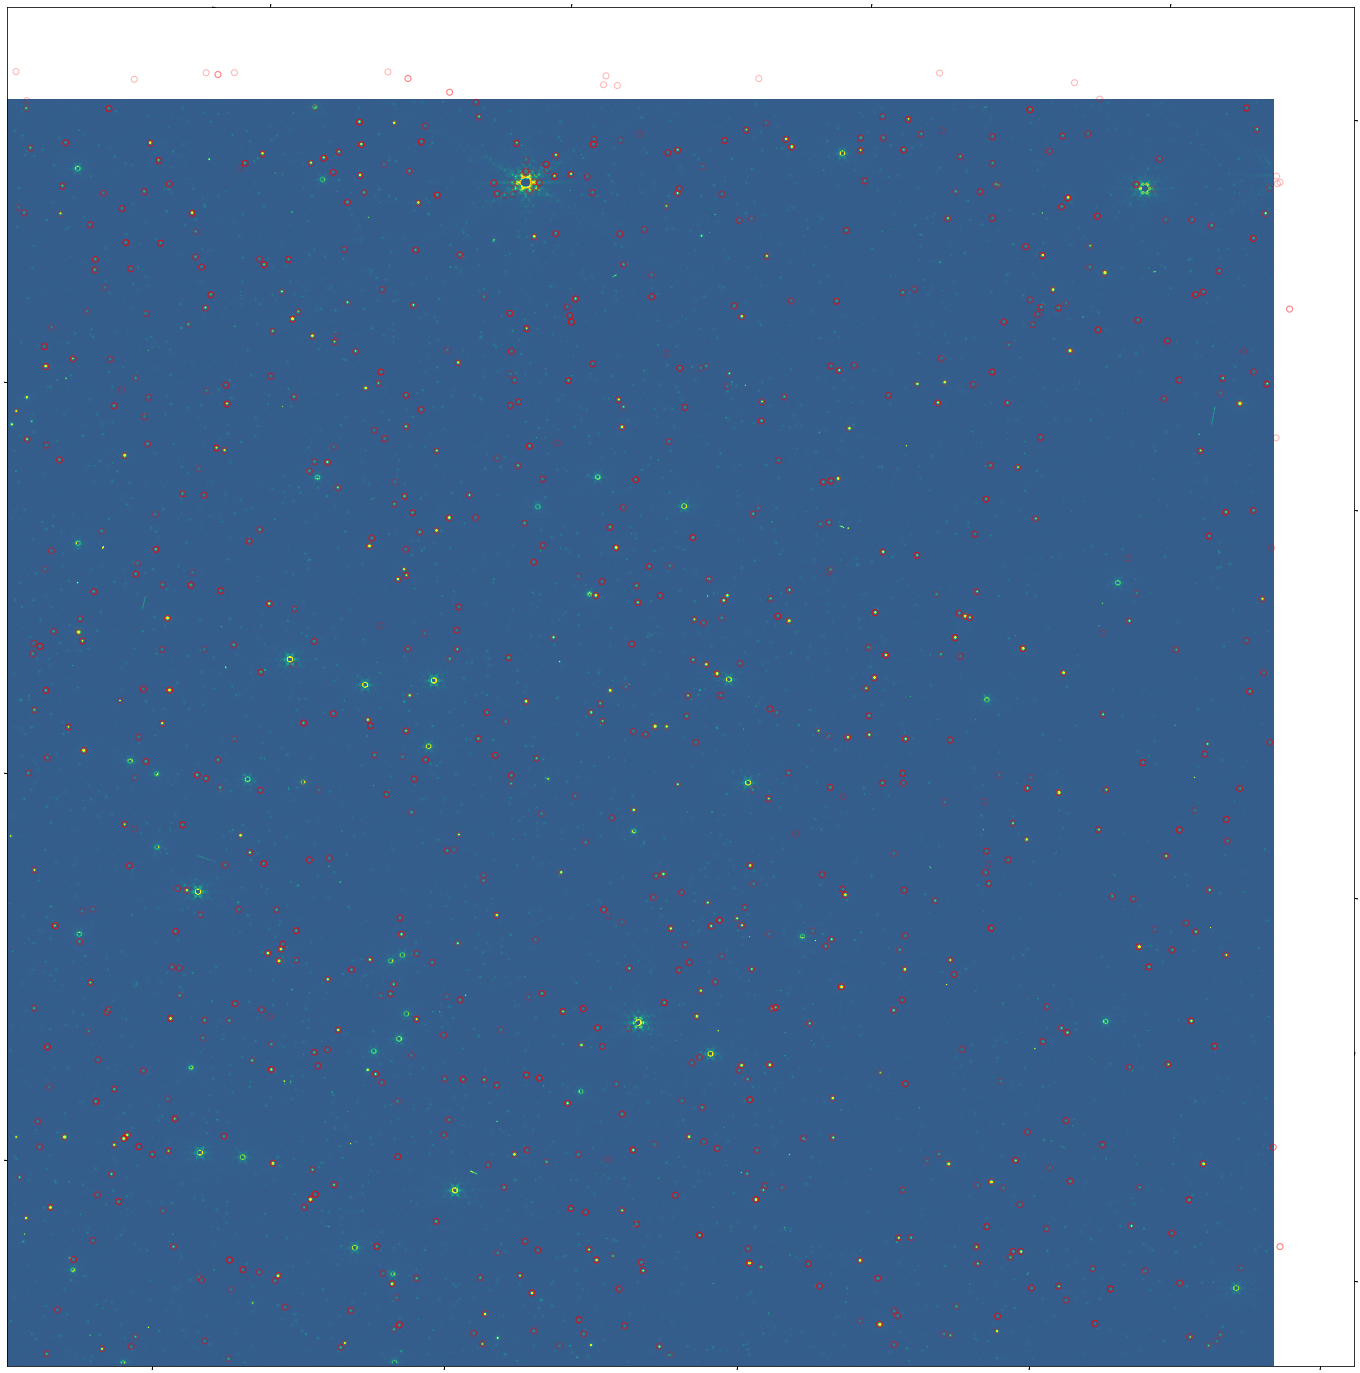

In [47]:
plt.figure(figsize=(25, 25))
ax = plt.subplot(projection=wcs.WCS(fits.getheader(fn, ext=1)))
ax.imshow(np.nan_to_num(data), norm=simple_norm(data, stretch='log', max_percent=99.95, log_a=1))

for i in range(4):
    fr = i+1
    fn = f'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_0000{fr}_nrcalong_destreak_tweakregstep.fits'
    can = f'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_0000{fr}_nrcalong_destreak_cat.ecsv'
    tbl = Table.read(can)
    hdr = fits.getheader(fn, ext=1)
    ww = wcs.WCS(hdr)
    gwcs = asdf.open(fn).tree['meta']['wcs']
    data = np.nan_to_num(fits.getdata(fn, ext=1))
    crds_world = ww.pixel_to_world(tbl['x'], tbl['y'])

    ax.scatter(crds_world.ra, crds_world.dec, edgecolor='r', facecolor='none', transform=ax.get_transform('world'), alpha=0.3)

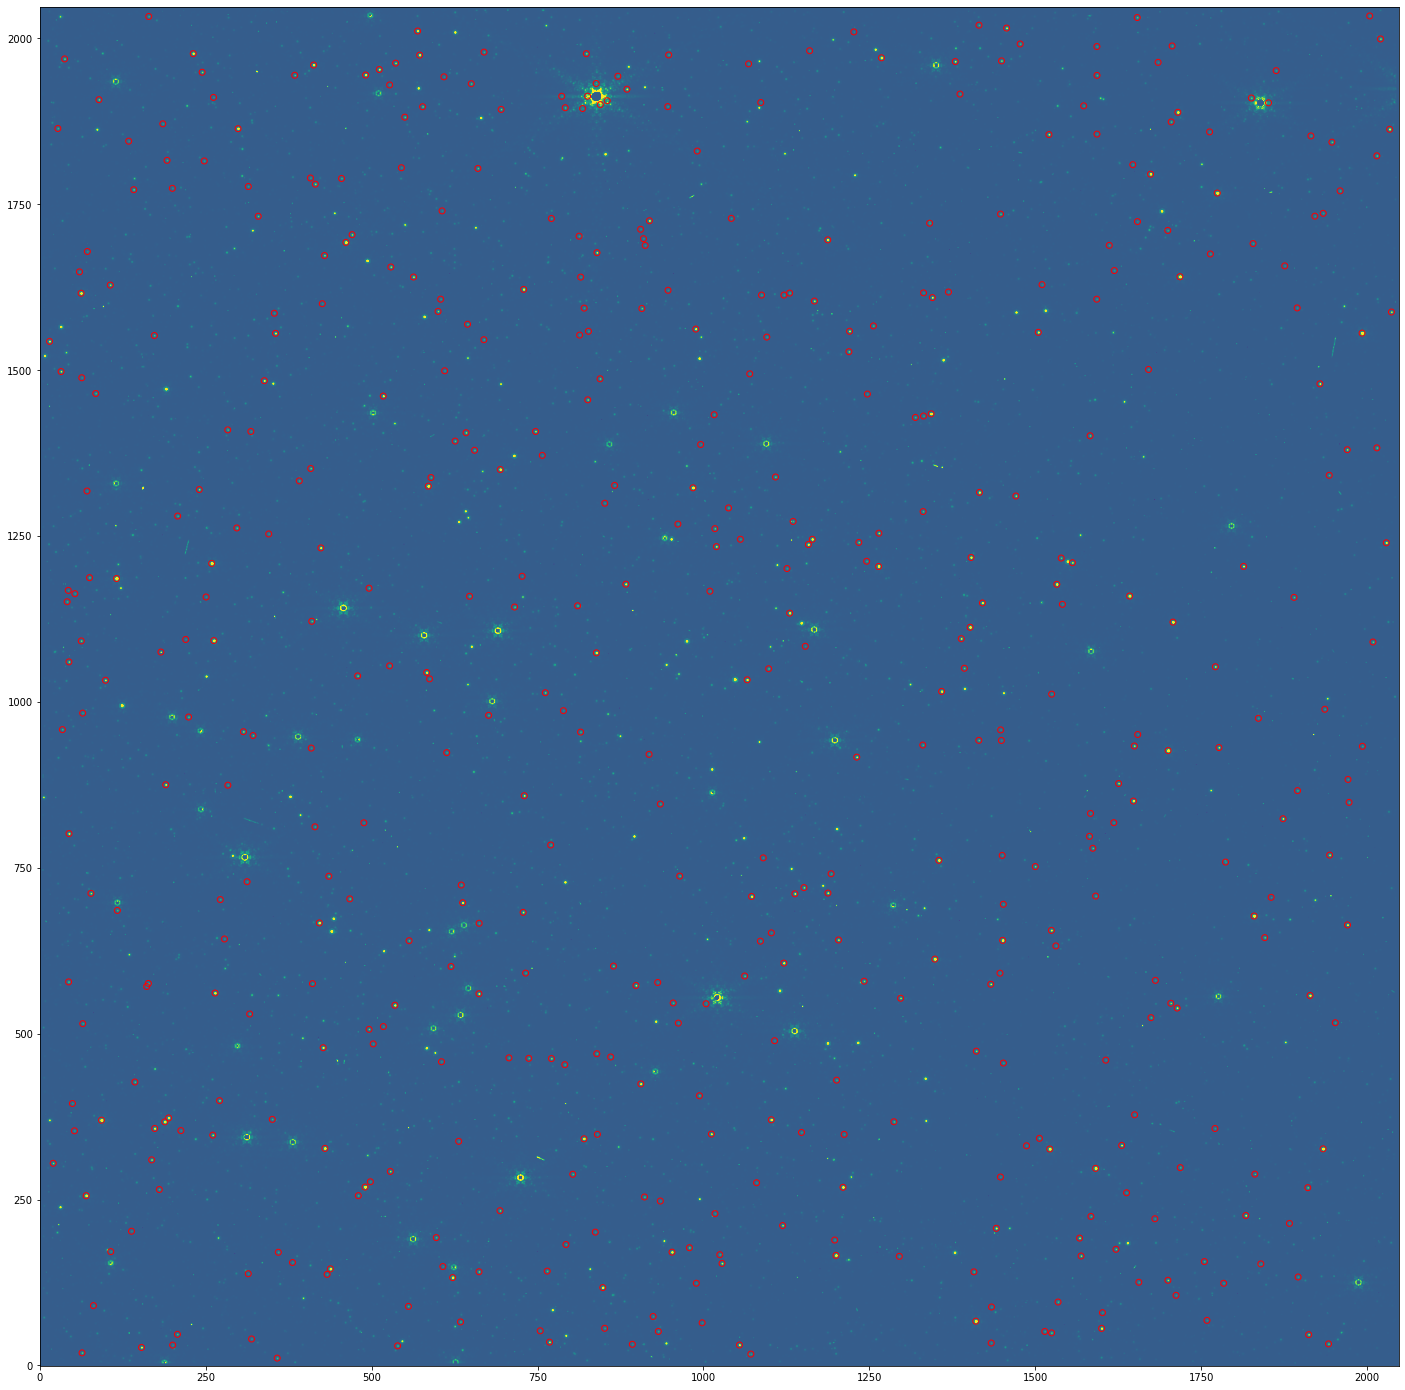

In [48]:
plt.figure(figsize=(25,25))
#data = fits.getdata(destreak_fn, ext=1)
plt.imshow(np.nan_to_num(data), norm=simple_norm(data, stretch='log', max_percent=99.95, log_a=1))
plt.scatter(tbl['x'], tbl['y'], edgecolor='r', facecolor='none')
plt.savefig('test.pdf')

In [83]:
imfile = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned_to_vvv.fits'


In [70]:
align_to_catalogs.retrieve_vvv?

Signature:
align_to_catalogs.retrieve_vvv(
    basepath='/orange/adamginsburg/jwst/brick/',
    filtername='f212n',
    module='nrca',
    imfile=None,
    catfile=None,
    fov_regname='regions/nircam_brick_fov.reg',
    fieldnumber='001',
)
Docstring: <no docstring>
File:      /blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction/align_to_catalogs.py
Type:      function


In [80]:
max_offset=0.4*u.arcsec
mag_limit=15

In [71]:
basepath = '/orange/adamginsburg/jwst/cloudc/'
filtername = 'f405n'
module = 'nrca'
fov_regname = 'regions/nircam_cloudc_fov.reg'
fieldnumber = '002'

vvvdr2_crds, vvvdr2 = retrieve_vvv(basepath=basepath, filtername=filtername, module=module, fov_regname=fov_regname, fieldnumber=fieldnumber)

In [75]:
catfile = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_cat.ecsv'

In [76]:
cat = Table.read(catfile)

In [78]:
cat.columns

<TableColumns names=('label','xcentroid','ycentroid','sky_centroid','aper_bkg_flux','aper_bkg_flux_err','aper30_flux','aper30_flux_err','aper50_flux','aper50_flux_err','aper70_flux','aper70_flux_err','aper_total_flux','aper_total_flux_err','aper30_abmag','aper30_abmag_err','aper50_abmag','aper50_abmag_err','aper70_abmag','aper70_abmag_err','aper_total_abmag','aper_total_abmag_err','aper30_vegamag','aper30_vegamag_err','aper50_vegamag','aper50_vegamag_err','aper70_vegamag','aper70_vegamag_err','aper_total_vegamag','aper_total_vegamag_err','CI_50_30','CI_70_50','CI_70_30','is_extended','sharpness','roundness','nn_label','nn_dist','isophotal_flux','isophotal_flux_err','isophotal_abmag','isophotal_abmag_err','isophotal_vegamag','isophotal_vegamag_err','isophotal_area','semimajor_sigma','semiminor_sigma','ellipticity','orientation','sky_orientation','sky_bbox_ll','sky_bbox_ul','sky_bbox_lr','sky_bbox_ur')>

In [81]:
mag = cat['aper_total_vegamag']
sel = mag < mag_limit
log.info(f"For {filtername} {module} {fieldnumber} catalog {catfile}, found {sel.sum()} of {sel.size} sources meeting criteria mag<{mag_limit}")

if sel.sum() == 0:
    print(f"min mag: {np.nanmin(mag)}, max mag: {np.nanmax(mag)}")
    raise ValueError("No sources passed basic selection criteria")


INFO: For f405n nrca 002 catalog /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_cat.ecsv, found 9430 of 19563 sources meeting criteria mag<15 [unknown]


In [84]:
skycrds_cat_orig = cat['sky_centroid']
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
    ww.wcs.crval = ww.wcs.crval #- [raoffset.to(u.deg).value, decoffset.to(u.deg).value]
skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


In [85]:
skycrds_cat

<SkyCoord (ICRS): (ra, dec) in deg
    [(266.6116758 , -28.57238397), (266.61144312, -28.57462236),
     (266.61239491, -28.56494607), ..., (266.54943692, -28.65391919),
     (266.55121546, -28.64434806), (266.54431247, -28.67952259)]>

In [86]:
skycrds_cat_orig

<SkyCoord (ICRS): (ra, dec) in deg
    [(266.61532293, -28.55494669), (266.61509265, -28.55714615),
     (266.61605212, -28.54761668), ..., (266.55838155, -28.63271751),
     (266.55926515, -28.62429053), (266.55598719, -28.65428444)]>